In [1]:
using DataFrames
using DataStructures
using StatsPlots
using Distributions
using Interpolations
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
hypos=range(0, 1, length=101)
pmf=pmf_from_seq(hypos)
data=(140, 250)
pmf = update_binomial(pmf, data);

In [3]:
cum = DataFrame(Index=values(pmf), cmf=[cdf(pmf, x) for x in values(pmf)]);

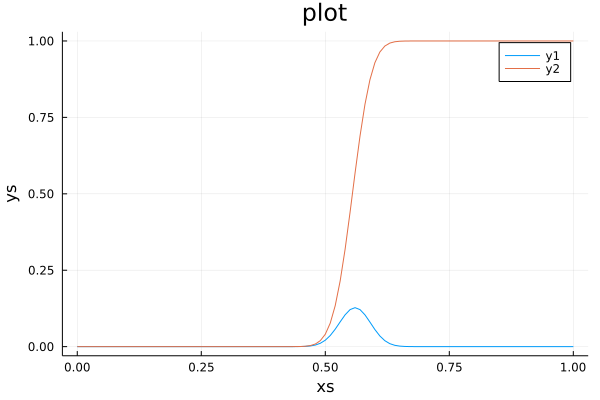

In [4]:
plot(pmf)
plot!(cum.Index, cum.cmf)

In [5]:
loc(cum, 0.61)

,Index,cmf
,Float64,Float64
62,0.61,0.96383


In [6]:
c = make_cdf(pmf);

In [7]:
cdf(c, 0.61)

0.9638303193984253

In [8]:
cdf(c, 0.615)

0.9735854849783132

In [9]:
credible_interval(c, 0.9)

2-element Vector{Float64}:
 0.5025940531880351
 0.6060343347469462

In [10]:
p = make_pdf(c)

101×2 DataFrame
 Row │ a        b            
     │ Float64  Float64      
─────┼───────────────────────
   1 │    0.0   0.0
   2 │    0.01  1.25633e-207
   3 │    0.02  5.73192e-166
   4 │    0.03  8.33871e-142
   5 │    0.04  8.26926e-125
   6 │    0.05  9.65227e-112
   7 │    0.06  3.66836e-101
   8 │    0.07  2.66736e-92
  ⋮  │    ⋮          ⋮
  95 │    0.94  2.22045e-16
  96 │    0.95  2.22045e-16
  97 │    0.96  2.22045e-16
  98 │    0.97  2.22045e-16
  99 │    0.98  2.22045e-16
 100 │    0.99  2.22045e-16
 101 │    1.0   2.22045e-16
              86 rows omitted

In [11]:
make_die(x) = pmf_from_seq(1:x)

make_die (generic function with 1 method)

In [12]:
die=make_die(6)
dice = fill(die, 3);

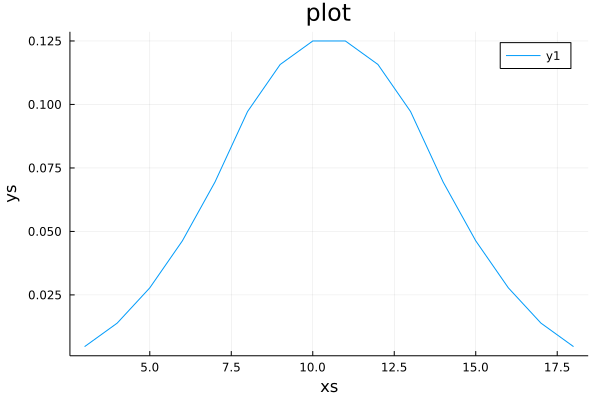

In [13]:
pmf_3d6 = reduce(add_dist, dice)
plot(pmf_3d6)

In [14]:
n = 10000
a = rand(1:6, (n, 4));

In [15]:
sort!(a, dims=2);

In [16]:
a[1:6,:]

6×4 Matrix{Int64}:
 2  3  4  5
 1  3  4  6
 3  4  6  6
 1  2  3  6
 4  5  5  6
 3  3  4  6

In [17]:
t = sum(a[:,2:end], dims=2);

In [18]:
pmf_best3 = pmf_from_seq(t[1:10000]);


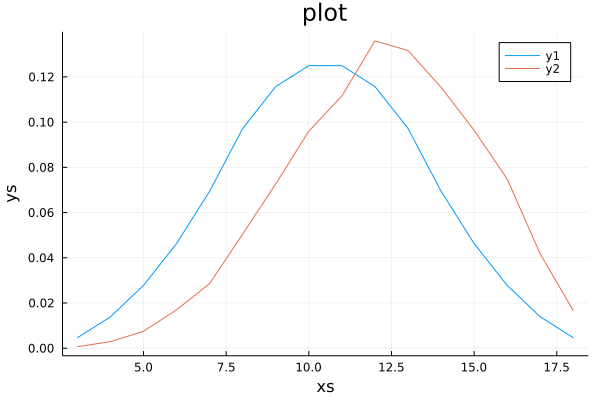

In [19]:
plot!(pmf_best3)

In [23]:
cdf_best3 = make_cdf(pmf_best3);

In [24]:
cdf_max6 = cdf_best3^6;

In [26]:
pmf_max6 = make_pdf(cdf_max6);

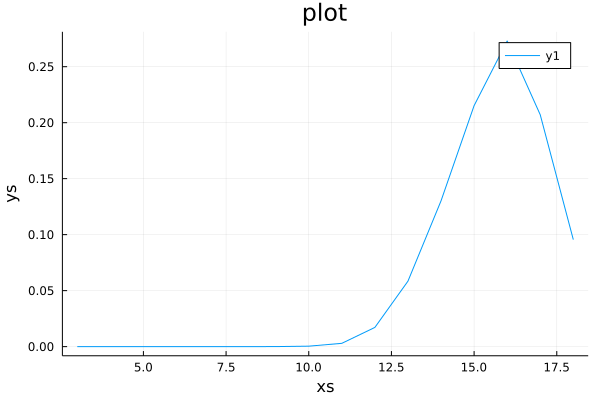

In [27]:
plot(pmf_max6)

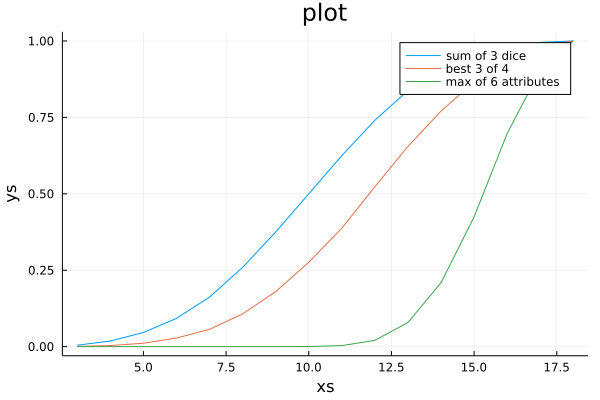

In [29]:
cdf_3d6 = make_cdf(pmf_3d6)
plot(cdf_3d6, label="sum of 3 dice")
plot!(cdf_best3, label="best 3 of 4")
plot!(cdf_max6, label="max of 6 attributes")